In [2]:
import sys
sys.path.append("/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMe/python_analysis/analysisTools")
from analysisImports import *
setLibParams()

cfgDir = "/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMe/python_analysis/configs/"
plt.style.use(cfgDir+'plt_settings.mplstyle')
plt.style.use('plt_settings.mplstyle')
NanoAODSchema.warn_missing_crossrefs = False

In [9]:
importlib.reload(aTools)
az = aTools.Analyzer('sample_configs/signal_aEM.json','histo_configs/histoList.json','histo_configs/histoPlotConfig.json')
fileset = az.sample_locs
samples = az.sample_names
sample_info = az.sample_info
histos = az.histos

In [22]:
az.sample_locs

{'sig_2018_Mchi-48.0_dMchi-16.0_ctau-1': ['root://cmsxrootd.fnal.gov//store/group/lpcmetx/iDMe//Samples/Ntuples/signal/2018/Mchi-48p0_dMchi-16p0/ctau-1//ntuples_Mchi-48p0_dMchi-16p0_ctau-1_withTimingCleaningECAL_00.root',
  'root://cmsxrootd.fnal.gov//store/group/lpcmetx/iDMe//Samples/Ntuples/signal/2018/Mchi-48p0_dMchi-16p0/ctau-1//ntuples_Mchi-48p0_dMchi-16p0_ctau-1_withTimingCleaningECAL_01.root',
  'root://cmsxrootd.fnal.gov//store/group/lpcmetx/iDMe//Samples/Ntuples/signal/2018/Mchi-48p0_dMchi-16p0/ctau-1//ntuples_Mchi-48p0_dMchi-16p0_ctau-1_withTimingCleaningECAL_02.root',
  'root://cmsxrootd.fnal.gov//store/group/lpcmetx/iDMe//Samples/Ntuples/signal/2018/Mchi-48p0_dMchi-16p0/ctau-1//ntuples_Mchi-48p0_dMchi-16p0_ctau-1_withTimingCleaningECAL_03.root',
  'root://cmsxrootd.fnal.gov//store/group/lpcmetx/iDMe//Samples/Ntuples/signal/2018/Mchi-48p0_dMchi-16p0/ctau-1//ntuples_Mchi-48p0_dMchi-16p0_ctau-1_withTimingCleaningECAL_04.root',
  'root://cmsxrootd.fnal.gov//store/group/lpcmetx/

In [10]:
proc = aTools.iDMeProcessor(samples,sample_info,fileset,histos)
out = processor.run_uproot_job(fileset,
                              treename='ntuples/outT',
                              processor_instance=proc,
                              executor=processor.iterative_executor,
                              executor_args={
                                  "schema":NanoAODSchema
                              })

Preprocessing:   0%|          | 0/44 [00:00<?, ?file/s]

Processing:   0%|          | 0/44 [00:00<?, ?chunk/s]

In [18]:
coffea.util.save(out,"test_histos.coffea")

/uscms_data/d3/sbrightt/miniconda3/envs/coffea/lib/python3.8/site-packages/coffea/hist/plot.py:333: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)


<AxesSubplot:xlabel='$p_{T}$ [GeV]', ylabel='Events'>

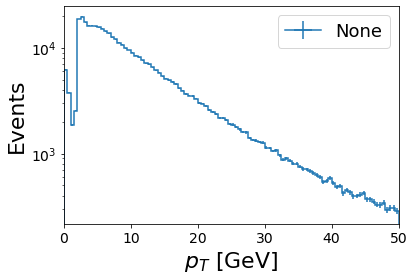

In [19]:
out2 = coffea.util.load("test_histos.coffea")
h = out2['ele_kinematics']
hd = h.integrate('sample',int_range='sig_2018_Mchi-48.0_dMchi-16.0_ctau-1').integrate('ele_type',int_range='Default')
hd2 = h.integrate('sample',int_range='sig_2018_Mchi-48.0_dMchi-16.0_ctau-1').integrate('ele_type',int_range='Default')
hd = hd.integrate('eta',overflow='all').integrate('phi',overflow='all')
plt.yscale('log')
hist.plot1d(hd)

In [3]:
fname = "root://cmsxrootd.fnal.gov//store/group/lpcmetx/iDMe//Samples/Ntuples/signal/2018/Mchi-48p0_dMchi-16p0/ctau-1//ntuples_Mchi-48p0_dMchi-16p0_ctau-1_withTimingCleaningECAL_00.root"
NanoAODSchema.warn_missing_crossrefs = False
loc = uproot.open(fname)
events = NanoEventsFactory.from_root(loc,treepath="ntuples/outT",schemaclass=NanoAODSchema).events()
events.Conversion

<NanoCollectionArray [[{energy: 17.2, eta: -0.95, ... []] type='26749 * var * st...'>

In [14]:
from coffea.nanoevents.methods import vector
ak.behavior.update(vector.behavior)
x = events.Conversion.x
y = events.Conversion.y
z = events.Conversion.z
conv_pos = ak.zip(
    {
        "x":x,
        "y":y,
        "z":z
    },
    with_name="ThreeVector"
)
gen_eles = events.GenPart[events.GenPart.ID == 11]
gen_x = gen_eles.x
gen_y = gen_eles.y
gen_z = gen_eles.z
gen_pos = ak.zip(
    {
        "x":gen_x,
        "y":gen_y,
        "z":gen_z
    },
    with_name="ThreeVector"
)

In [15]:
gen_pos = ak.with_name(ak.broadcast_arrays(ak.flatten(gen_pos),conv_pos)[0],"ThreeVector")
delta = (gen_pos - conv_pos).rho

In [16]:
closest = ak.argmin(delta,axis=1,keepdims=True)
match = ak.fill_none(ak.flatten(delta[closest]) < 5,False)
conv_match = conv_pos[closest][match]
len(conv_match)/len(events.eventNum)

0.015290291225840219

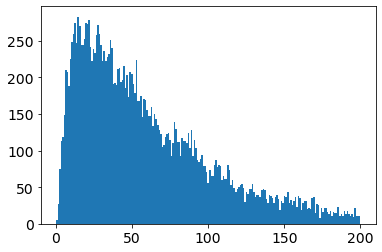

In [202]:
d = test - conv_pos
h = plt.hist(ak.flatten(d.rho),bins=np.linspace(0,200,num=200))

In [187]:
np.sqrt((33.9-59)**2 + (0.271-71.8)**2)

75.80506474504193

In [188]:
d[8][0]

<TwoVectorRecord {x: -25, y: -71.6} type='TwoVector["x": float32, "y": float32]'>

In [189]:
np.sqrt(25**2 + 71.6**2)

75.83904007831322